# PSM on GI Bleed Cohort

## Imports

In [82]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd

## Functions

In [83]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)

## Data Prep

In [84]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/albumin_cleaned_for_psm_sg1.csv')

In [85]:
df.drop(columns=['LOS_hours'], inplace=True)

In [86]:
df.shape

(11839, 15)

In [87]:
df.albumin_24hrs.value_counts()

0.0    11266
1.0      573
Name: albumin_24hrs, dtype: int64

In [88]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [89]:
df.head()

personid                           encounterid  \
0  561afc23-43fa-4108-8d23-01cd03d0001f  b0f0d40d-6270-4c3e-a68e-ab460b6fc519   
1  96c2912b-6b71-43ca-9eb4-edf5b128c4b6  94ca7573-09d1-4345-84be-1ed95ce64e5b   
2  ae8cb105-b09f-4fa1-abf1-4391402aec50  2754019c-51a9-4f0f-893d-1226cc9f1262   
3  f146fbdc-3096-4c16-aa7e-c8d0ebd287af  b0f368bf-76f8-408d-8c77-eac278094f87   
4  2b6e3c13-d1fa-4095-8cc3-875bbf0d6abe  e4b75e71-266a-4ec1-872f-c6e053b31cb3   

   albumin_24hrs  Cirrhosis  anemia_status  30_day_mortality  ICU  \
0            1.0          0            3.0                 0    0   
1            0.0          0            3.0                 0    0   
2            0.0          0            3.0                 0    0   
3            1.0          0            3.0                 0    0   
4            0.0          0            3.0                 0    1   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               2.9      1   
2                 0                   1    5               2.5      0   
3                 0                   0    1               3.3      1   
4                 0                   1    1               2.7      0   

   beta_blocker  hemorrhagic  SAPS  
0             0            0    17  
1             0            0    12  
2             0            1    33  
3             0            0    17  
4             0            0    22

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11839 entries, 0 to 11838
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   personid            11839 non-null  object 
 1   encounterid         11839 non-null  object 
 2   albumin_24hrs       11839 non-null  float64
 3   Cirrhosis           11839 non-null  int64  
 4   anemia_status       11839 non-null  float64
 5   30_day_mortality    11839 non-null  int64  
 6   ICU                 11839 non-null  int64  
 7   mass_transfusion    11839 non-null  int64  
 8   total_transfusions  11839 non-null  int64  
 9   CCI                 11839 non-null  int64  
 10  bl_albumin_value    11839 non-null  float64
 11  qSOFA               11839 non-null  int64  
 12  beta_blocker        11839 non-null  int64  
 13  hemorrhagic         11839 non-null  int64  
 14  SAPS                11839 non-null  int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 1.4

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [91]:
am = df[df['albumin_24hrs'] == 1]['30_day_mortality'].value_counts()
print(am)

0    508
1     65
Name: 30_day_mortality, dtype: int64


In [92]:
mrate(am)

30 Day Mortality Rate (pct): 11.343804537521814


In [93]:
nam = df[df['albumin_24hrs'] == 0]['30_day_mortality'].value_counts()
print(nam)

0    10634
1      632
Name: 30_day_mortality, dtype: int64


In [94]:
mrate(nam)

30 Day Mortality Rate (pct): 5.609799396413989


In [95]:
df_a24 = df[['personid', 'encounterid', '30_day_mortality']]

In [96]:
df_a24.head()

personid                           encounterid  \
0  561afc23-43fa-4108-8d23-01cd03d0001f  b0f0d40d-6270-4c3e-a68e-ab460b6fc519   
1  96c2912b-6b71-43ca-9eb4-edf5b128c4b6  94ca7573-09d1-4345-84be-1ed95ce64e5b   
2  ae8cb105-b09f-4fa1-abf1-4391402aec50  2754019c-51a9-4f0f-893d-1226cc9f1262   
3  f146fbdc-3096-4c16-aa7e-c8d0ebd287af  b0f368bf-76f8-408d-8c77-eac278094f87   
4  2b6e3c13-d1fa-4095-8cc3-875bbf0d6abe  e4b75e71-266a-4ec1-872f-c6e053b31cb3   

   30_day_mortality  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [97]:
#df.drop(columns=['personid', 'encounterid', 'albumin_24'], inplace=True)

In [98]:
df.shape

(11839, 15)

In [99]:
df.head()

personid                           encounterid  \
0  561afc23-43fa-4108-8d23-01cd03d0001f  b0f0d40d-6270-4c3e-a68e-ab460b6fc519   
1  96c2912b-6b71-43ca-9eb4-edf5b128c4b6  94ca7573-09d1-4345-84be-1ed95ce64e5b   
2  ae8cb105-b09f-4fa1-abf1-4391402aec50  2754019c-51a9-4f0f-893d-1226cc9f1262   
3  f146fbdc-3096-4c16-aa7e-c8d0ebd287af  b0f368bf-76f8-408d-8c77-eac278094f87   
4  2b6e3c13-d1fa-4095-8cc3-875bbf0d6abe  e4b75e71-266a-4ec1-872f-c6e053b31cb3   

   albumin_24hrs  Cirrhosis  anemia_status  30_day_mortality  ICU  \
0            1.0          0            3.0                 0    0   
1            0.0          0            3.0                 0    0   
2            0.0          0            3.0                 0    0   
3            1.0          0            3.0                 0    0   
4            0.0          0            3.0                 0    1   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               2.9      1   
2                 0                   1    5               2.5      0   
3                 0                   0    1               3.3      1   
4                 0                   1    1               2.7      0   

   beta_blocker  hemorrhagic  SAPS  
0             0            0    17  
1             0            0    12  
2             0            1    33  
3             0            0    17  
4             0            0    22

## Initialize PsmPy Class

In [100]:
psm = PsmPy(df, treatment= 'albumin_24hrs', indx='encounterid', exclude = ['personid', '30_day_mortality'])

In [101]:
%%time
psm.logistic_ps(balance = True)

Wall time: 2.27 s


In [102]:
df_psm = psm.predicted_data

In [103]:
df_psm.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
1  b0f368bf-76f8-408d-8c77-eac278094f87          0            3.0    0   
2  ff6c735a-74d5-42c1-9f09-6ec2b96d664a          0            3.0    0   
3  09821c9f-88a1-42ba-a6bf-9648290d4187          0            3.0    1   
4  97bd85d7-e40e-444f-8163-3ef89ee442f1          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               3.3      1   
2                 0                   1    8               3.2      1   
3                 0                   1    8               2.7      0   
4                 0                   0    2               1.4      1   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             0            0    17          0.319608         -0.755575   
1             0            0    17          0.252748         -1.084012   
2             0            0    19          0.428974         -0.286037   
3             0            0    24          0.594973          0.384563   
4             0            0    36          0.675543          0.733365   

   albumin_24hrs  
0              1  
1              1  
2              1  
3              1  
4              1

## Plot the propensity score / propensity logits

In [104]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 34.7 s


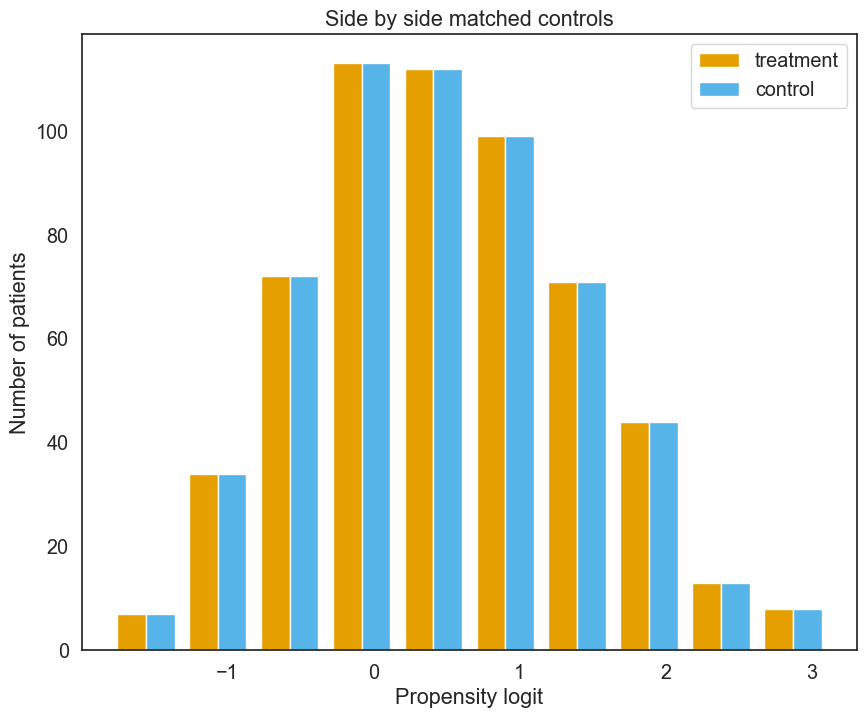

In [105]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

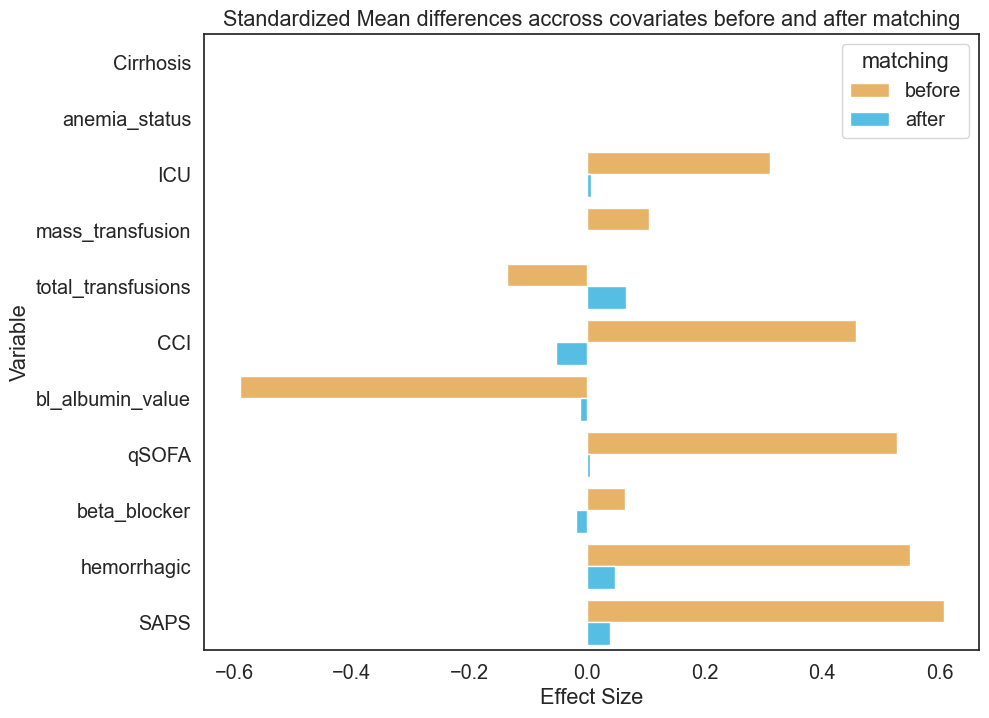

In [106]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [107]:
matched_df = psm.df_matched

In [108]:
matched_df.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
1  b0f368bf-76f8-408d-8c77-eac278094f87          0            3.0    0   
2  ff6c735a-74d5-42c1-9f09-6ec2b96d664a          0            3.0    0   
3  09821c9f-88a1-42ba-a6bf-9648290d4187          0            3.0    1   
4  97bd85d7-e40e-444f-8163-3ef89ee442f1          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               3.3      1   
2                 0                   1    8               3.2      1   
3                 0                   1    8               2.7      0   
4                 0                   0    2               1.4      1   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             0            0    17          0.319608         -0.755575   
1             0            0    17          0.252748         -1.084012   
2             0            0    19          0.428974         -0.286037   
3             0            0    24          0.594973          0.384563   
4             0            0    36          0.675543          0.733365   

   albumin_24hrs  
0              1  
1              1  
2              1  
3              1  
4              1

In [109]:
matched_df.shape

(1146, 15)

## Matched Ids

In [110]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  b0f0d40d-6270-4c3e-a68e-ab460b6fc519  c708022b-f720-48c5-b01b-631823d86e26
1  b0f368bf-76f8-408d-8c77-eac278094f87  4989050b-bca1-4c23-b6a5-62b4f37f78ac
2  ff6c735a-74d5-42c1-9f09-6ec2b96d664a  c15aa317-ca6d-450b-9369-94a55edecc8a
3  09821c9f-88a1-42ba-a6bf-9648290d4187  38e2c1ab-1d1a-44d0-a147-ffa27e72de44
4  97bd85d7-e40e-444f-8163-3ef89ee442f1  fc96734a-7164-4e43-8a90-1c29500b57be

## Effect sizes per variables

In [111]:
psm.effect_size

Variable matching  Effect Size
0            Cirrhosis   before     0.000000
1            Cirrhosis    after     0.000000
2        anemia_status   before     0.000000
3        anemia_status    after     0.000000
4                  ICU   before     0.312253
5                  ICU    after     0.007548
6     mass_transfusion   before     0.105335
7     mass_transfusion    after     0.000000
8   total_transfusions   before    -0.135225
9   total_transfusions    after     0.066511
10                 CCI   before     0.458283
11                 CCI    after    -0.051656
12    bl_albumin_value   before    -0.590442
13    bl_albumin_value    after    -0.011173
14               qSOFA   before     0.527437
15               qSOFA    after     0.006149
16        beta_blocker   before     0.065105
17        beta_blocker    after    -0.018582
18         hemorrhagic   before     0.549447
19         hemorrhagic    after     0.047825
20                SAPS   before     0.607544
21                SAPS    after     0.039235

## Explore Matched df

In [112]:
matched_df.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
1  b0f368bf-76f8-408d-8c77-eac278094f87          0            3.0    0   
2  ff6c735a-74d5-42c1-9f09-6ec2b96d664a          0            3.0    0   
3  09821c9f-88a1-42ba-a6bf-9648290d4187          0            3.0    1   
4  97bd85d7-e40e-444f-8163-3ef89ee442f1          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               3.3      1   
2                 0                   1    8               3.2      1   
3                 0                   1    8               2.7      0   
4                 0                   0    2               1.4      1   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             0            0    17          0.319608         -0.755575   
1             0            0    17          0.252748         -1.084012   
2             0            0    19          0.428974         -0.286037   
3             0            0    24          0.594973          0.384563   
4             0            0    36          0.675543          0.733365   

   albumin_24hrs  
0              1  
1              1  
2              1  
3              1  
4              1

In [113]:
matched_df.albumin_24hrs.value_counts()

1    573
0    573
Name: albumin_24hrs, dtype: int64

In [114]:
matched_df.shape

(1146, 15)

## Join Matched df with earlier df on encounterid to add outcome variables

In [115]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [116]:
f_df.shape

(1146, 17)

In [117]:
f_df.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
1  b0f368bf-76f8-408d-8c77-eac278094f87          0            3.0    0   
2  ff6c735a-74d5-42c1-9f09-6ec2b96d664a          0            3.0    0   
3  09821c9f-88a1-42ba-a6bf-9648290d4187          0            3.0    1   
4  97bd85d7-e40e-444f-8163-3ef89ee442f1          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               3.3      1   
2                 0                   1    8               3.2      1   
3                 0                   1    8               2.7      0   
4                 0                   0    2               1.4      1   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             0            0    17          0.319608         -0.755575   
1             0            0    17          0.252748         -1.084012   
2             0            0    19          0.428974         -0.286037   
3             0            0    24          0.594973          0.384563   
4             0            0    36          0.675543          0.733365   

   albumin_24hrs                              personid  30_day_mortality  
0              1  561afc23-43fa-4108-8d23-01cd03d0001f                 0  
1              1  f146fbdc-3096-4c16-aa7e-c8d0ebd287af                 0  
2              1  561afc23-43fa-4108-8d23-01cd03d0001f                 0  
3              1  614252bd-c484-444c-8ed7-048ba727b3fb                 0  
4              1  8b965468-6371-47a8-9819-6cfadb988043                 1

In [118]:
df = f_df

In [119]:
am = df[df['albumin_24hrs'] == 1]['30_day_mortality'].value_counts()
print(am)

0    508
1     65
Name: 30_day_mortality, dtype: int64


In [120]:
mrate(am)

30 Day Mortality Rate (pct): 11.343804537521814


In [121]:
nam = df[df['albumin_24hrs'] == 0]['30_day_mortality'].value_counts()
print(nam)

0    501
1     72
Name: 30_day_mortality, dtype: int64


In [122]:
mrate(nam)

30 Day Mortality Rate (pct): 12.56544502617801


In [124]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/blood_diseases_matched_alb_24h_full_1.csv', index=False)